In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import csv
import os
from os import listdir
from os.path import isfile, join
from sklearn.cluster import KMeans 

In [5]:
path = glob.glob("Data/*.jpg")             #setting the path
cv_img = []
for img in path:                            #reading the image from the path and storing it in the list
    n = cv.imread(img)
    cv_img.append(n)

In [6]:
print(cv_img)                               #printing the output

[array([[[ 18,  40,  28],
        [ 24,  46,  34],
        [  1,  23,  11],
        ...,
        [ 10,  15,  16],
        [ 11,  15,  16],
        [ 11,  15,  16]],

       [[ 41,  63,  51],
        [ 52,  74,  62],
        [ 35,  57,  45],
        ...,
        [ 15,  20,  21],
        [ 16,  20,  21],
        [ 15,  19,  20]],

       [[ 25,  47,  35],
        [ 47,  69,  57],
        [ 52,  74,  62],
        ...,
        [ 22,  28,  27],
        [ 22,  27,  26],
        [ 21,  26,  25]],

       ...,

       [[ 73,  85,  85],
        [ 73,  85,  85],
        [ 75,  87,  87],
        ...,
        [116, 129, 127],
        [115, 129, 127],
        [115, 128, 126]],

       [[ 68,  79,  83],
        [ 66,  77,  81],
        [ 71,  82,  86],
        ...,
        [117, 127, 127],
        [115, 127, 127],
        [117, 127, 127]],

       [[ 68,  78,  85],
        [ 66,  76,  83],
        [ 71,  81,  88],
        ...,
        [117, 127, 127],
        [117, 127, 127],
        [117, 127, 127]

In [7]:
sift_output = pd.DataFrame()                                    #creating an empty dataframe

des_row = []

#The following function will read the images stored in the list called cv_img.
#Then it will convert ti to grayscale image and resize it. 
#SIFT keypoints and descriptors will be calculated
#We store the descriptor in dataframe
#Since, descriptor is matirix of size k x 128, we also require k value in other functions. So, we store the value of k in list called 
#des_row
for image in cv_img:
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    
    resize = cv.resize(gray, (255,255))
    
    sift = cv.xfeatures2d.SIFT_create()

    kp, des = sift.detectAndCompute(resize,None)
    
    des_row.append(des.shape[0])

    sift_output = sift_output.append(pd.DataFrame(des))

In [8]:
sift_output.to_csv("output.csv", header=False, index=False)   #Writing the content of sift_output dataframe to csv file. We are omitting header and index to avoid potential data loss

In [9]:
df = pd.read_csv("output.csv", header=None)                     #reading the data returned from SIFT 
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,17.0,11.0,7.0,62.0,107.0,20.0,6.0,1.0,133.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,26.0,...,83.0,66.0,13.0,1.0,1.0,1.0,3.0,4.0,4.0,32.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,11.0,59.0,24.0,0.0,0.0,0.0,0.0,2.0,5.0,51.0
3,73.0,88.0,7.0,1.0,0.0,0.0,4.0,47.0,129.0,129.0,...,3.0,125.0,60.0,17.0,0.0,0.0,0.0,0.0,0.0,21.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,3.0,...,11.0,81.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118364,12.0,4.0,1.0,3.0,64.0,113.0,11.0,8.0,17.0,4.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
118365,9.0,3.0,1.0,16.0,47.0,10.0,0.0,2.0,85.0,21.0,...,0.0,34.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
118366,3.0,2.0,1.0,3.0,114.0,17.0,0.0,1.0,32.0,12.0,...,2.0,2.0,0.0,0.0,0.0,0.0,43.0,107.0,2.0,0.0
118367,0.0,0.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,50.0,133.0,20.0,0.0,0.0,0.0,0.0


In [12]:
print(des_row)                          #Printing the value of k (k returned from SIFT descriptors)

[364, 443, 376, 162, 135, 85, 85, 109, 152, 178, 204, 125, 533, 137, 119, 59, 94, 90, 88, 32, 301, 140, 69, 523, 107, 65, 73, 70, 55, 96, 114, 52, 93, 389, 458, 396, 406, 204, 419, 122, 872, 261, 318, 330, 358, 179, 119, 237, 209, 212, 197, 131, 123, 200, 125, 200, 426, 224, 193, 228, 224, 157, 127, 173, 250, 244, 245, 300, 187, 157, 204, 207, 99, 171, 110, 105, 116, 132, 211, 87, 89, 31, 160, 93, 111, 173, 201, 197, 308, 225, 355, 394, 420, 428, 280, 204, 227, 234, 224, 261, 279, 233, 206, 166, 112, 220, 257, 212, 157, 84, 69, 364, 243, 81, 160, 211, 185, 176, 157, 142, 174, 233, 342, 191, 310, 295, 315, 332, 419, 302, 435, 418, 347, 315, 237, 337, 335, 311, 147, 272, 12, 247, 236, 272, 418, 306, 210, 305, 283, 356, 262, 146, 162, 180, 72, 85, 232, 45, 50, 151, 393, 456, 220, 274, 230, 177, 58, 181, 259, 317, 302, 249, 318, 319, 224, 310, 299, 63, 161, 294, 179, 288, 359, 271, 189, 241, 280, 319, 97, 171, 139, 150, 241, 98, 136, 197, 232, 138, 119, 293, 129, 121, 205, 128, 106, 56, 83

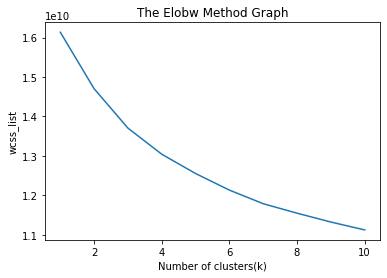

In [10]:
x = df.values[:,1:]                             #selection all columns as feature

from sklearn.cluster import KMeans  
wcss_list= []                                   #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)       #K means clustering  
    kmeans.fit(x)                                                           #fittin the model
    wcss_list.append(kmeans.inertia_)                                       #   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)

plt.plot(range(1, 11), wcss_list)                                            #plotting the elbow graph 
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

[3 0 3 ... 1 0 2]


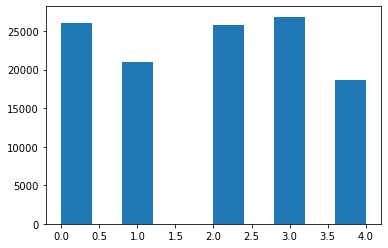

118369


In [11]:
#Import required module
from sklearn.cluster import KMeans

#Since the Elbow graph was inconclusive, we selected clusters to be 5
#Initialize the class object
kmeans = KMeans(n_clusters= 5)              

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)                        #Printing the labels
plt.hist(label)
#Plotting the histogram of labels
plt.show()

print(len(label))

In [13]:
#The following code will find the number of keypoints in each cluster 

cnt0 = 0
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0

for x in label:
    if x == 0:
        cnt0 = cnt0 + 1
    
    elif x == 1:
        cnt1 = cnt1 + 1
    
    elif x == 2:
        cnt2 = cnt2 + 1
    
    elif x == 3:
        cnt3 = cnt3 + 1
    
    else:
        cnt4 = cnt4 + 1

#Printing the values    
print("cnt0= ", cnt0)
print("cnt1= ", cnt1)
print("cnt2= ", cnt2)
print("cnt3= ", cnt3)
print("cnt4= ", cnt4)

cnt0=  26021
cnt1=  20988
cnt2=  25828
cnt3=  26855
cnt4=  18677


In [15]:
from os import listdir
from os.path import isfile, join

#The following code will read the name of each file in given directory
#Since the name is string, it will split and only keep the first word of the filename 
#This is required for data used in SVM

mypath = 'Data'                                                            #setting the path
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]         #reading the file name

name = []
for i in onlyfiles:                                                         #Spliting the filename and keeping first word only
    li = []
    li = list(i.split(" "))
    name.append(li[0])


print(name)


['down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down', 'down',

In [41]:
#The following code will read the values of k stored in des_row
#Then it will find the number of keypoints stored in each cluster for given images
#Once calculated, it will store that data along with images number and label in dataframe, which will be further stored in csv file

i = 0
j = 0
sum = 0
cluster = pd.DataFrame() 

for i, k in zip(des_row, range(len(des_row))):
    cnt0 = 0
    cnt1 = 0
    cnt2 = 0
    cnt3 = 0
    cnt4 = 0
    lst = []
    
    for j in range(i):
        if label[sum+j] == 0:
            cnt0 = cnt0 + 1
    
        elif label[sum+j] == 1:
            cnt1 = cnt1 + 1
    
        elif label[sum+j] == 2:
            cnt2 = cnt2 + 1
    
        elif label[sum+j] == 3:
            cnt3 = cnt3 + 1
    
        elif label[sum+j] == 4:
            cnt4 = cnt4 + 1
    
    lst = [[k+1, cnt0, cnt1, cnt2, cnt3, cnt4, name[k]]]
    
    cluster = cluster.append(pd.DataFrame(lst, columns=['Img','Cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'label']))
    sum = sum + i
    print("cnt0= ", cnt0)
    print("cnt1= ", cnt1)
    print("cnt2= ", cnt2)
    print("cnt3= ", cnt3)
    print("cnt4= ", cnt4)



cnt0=  117
cnt1=  25
cnt2=  81
cnt3=  111
cnt4=  30
cnt0=  118
cnt1=  84
cnt2=  66
cnt3=  96
cnt4=  79
cnt0=  143
cnt1=  10
cnt2=  41
cnt3=  175
cnt4=  7
cnt0=  66
cnt1=  12
cnt2=  18
cnt3=  61
cnt4=  5
cnt0=  45
cnt1=  9
cnt2=  35
cnt3=  33
cnt4=  13
cnt0=  20
cnt1=  10
cnt2=  21
cnt3=  26
cnt4=  8
cnt0=  20
cnt1=  5
cnt2=  39
cnt3=  15
cnt4=  6
cnt0=  25
cnt1=  6
cnt2=  40
cnt3=  33
cnt4=  5
cnt0=  35
cnt1=  8
cnt2=  63
cnt3=  41
cnt4=  5
cnt0=  54
cnt1=  11
cnt2=  42
cnt3=  64
cnt4=  7
cnt0=  61
cnt1=  11
cnt2=  55
cnt3=  71
cnt4=  6
cnt0=  33
cnt1=  9
cnt2=  43
cnt3=  38
cnt4=  2
cnt0=  92
cnt1=  139
cnt2=  89
cnt3=  107
cnt4=  106
cnt0=  44
cnt1=  19
cnt2=  36
cnt3=  27
cnt4=  11
cnt0=  50
cnt1=  21
cnt2=  26
cnt3=  17
cnt4=  5
cnt0=  15
cnt1=  5
cnt2=  18
cnt3=  15
cnt4=  6
cnt0=  17
cnt1=  16
cnt2=  30
cnt3=  14
cnt4=  17
cnt0=  17
cnt1=  5
cnt2=  32
cnt3=  14
cnt4=  22
cnt0=  16
cnt1=  7
cnt2=  40
cnt3=  19
cnt4=  6
cnt0=  2
cnt1=  0
cnt2=  25
cnt3=  4
cnt4=  1
cnt0=  101
cnt1=

In [42]:
cluster.set_index("Img", inplace=True)              #Setting the index to Img
print(cluster)

     Cluster 1  cluster 2  cluster 3  cluster 4  cluster 5 label
Img                                                             
1          117         25         81        111         30  down
2          118         84         66         96         79  down
3          143         10         41        175          7  down
4           66         12         18         61          5  down
5           45          9         35         33         13  down
..         ...        ...        ...        ...        ...   ...
500        119         55         50        159         52    up
501         86         63         62        143         87    up
502         56         29         87         41         45    up
503         73         42         77         38         45    up
504         54         22         77         42         16    up

[504 rows x 6 columns]


In [43]:
cluster.to_csv("svm.csv")                   #writing the data to csv file

In [44]:
dt = pd.read_csv("svm.csv")                 #Reading the data for SVM

In [45]:
dt.head()                                   #Printing the head

,Img,Cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,label
0,1,117,25,81,111,30,down
1,2,118,84,66,96,79,down
2,3,143,10,41,175,7,down
3,4,66,12,18,61,5,down
4,5,45,9,35,33,13,down


In [46]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Img        504 non-null    int64 
 1   Cluster 1  504 non-null    int64 
 2   cluster 2  504 non-null    int64 
 3   cluster 3  504 non-null    int64 
 4   cluster 4  504 non-null    int64 
 5   cluster 5  504 non-null    int64 
 6   label      504 non-null    object
dtypes: int64(6), object(1)
memory usage: 27.7+ KB


In [47]:
dt.describe()

,Img,Cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,252.500000,51.628968,41.642857,51.246032,53.283730,37.057540
std,145.636534,44.613775,34.947837,30.976535,43.713745,30.021905
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.750000,20.000000,15.000000,27.000000,21.000000,13.000000
50%,252.500000,38.500000,36.500000,44.500000,41.000000,31.000000
75%,378.250000,69.000000,60.000000,68.000000,73.000000,54.000000
max,504.000000,324.000000,454.000000,224.000000,262.000000,243.000000


In [48]:
dt.corr()

,Img,Cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
Img,1.000000,0.055712,-0.107359,0.275661,-0.016114,-0.045578
Cluster 1,0.055712,1.000000,0.455601,0.333635,0.888354,0.385380
cluster 2,-0.107359,0.455601,1.000000,0.235529,0.495198,0.727871
cluster 3,0.275661,0.333635,0.235529,1.000000,0.259071,0.125196
cluster 4,-0.016114,0.888354,0.495198,0.259071,1.000000,0.400616
cluster 5,-0.045578,0.385380,0.727871,0.125196,0.400616,1.000000


In [49]:
x = dt[['Cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']]               #setting x (features)
y = dt['label']                                                                         #setting y (target label)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)        #spliting the data for training and testing

In [53]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(403, 5) (101, 5) (403,) (101,)


In [54]:
#Importing the libraries

from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()                      #creating LabelEncoder object

In [56]:
encoder.fit(y_train)
Y_train = encoder.transform(y_train)                        #fitting the data to LabelEncoder and transforming it

In [57]:
encoder.fit(y_test)
Y_test = encoder.transform(y_test)                          #fitting the data to LabelEncoder and transforming it

In [58]:
num_cols = x_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)          #finding the number of numeric features

Number of numeric features: 5


In [59]:
names_of_predictors = list(x_train.columns.values)          #finding the names of features and printing it
                                 

In [60]:
print(names_of_predictors)

['Cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                                   #Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(x_train)              #fitting X_train to StandardScaler model
X_test_scaled = scaler.transform(x_test)                    #fitting X_test to StandardScaker model

In [62]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],                   
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]            #creating a dict to find best kernel, gamma value and C value for SVM

In [63]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)                              #Exhaustive search over specified parameter values for an estimator.
svm_model.fit(X_train_scaled, Y_train)                                          #fitting the model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [64]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_                                             #prediciting the output
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))                              #Scaling back the data to the original representation

Best score for training data: 0.6428395061728395 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [66]:
print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))       #Training accuracy
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))       #Testing accuracy

Training set score for SVM: 0.677419
Testing  set score for SVM: 0.663366
